# Training

In [310]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report

In [311]:
df = pd.read_csv("UFC_limpio.csv")
df.columns

Index(['Unnamed: 0', 'R_fighter', 'B_fighter', 'gender', 'weight_class',
       'year', 'R_age', 'B_age', 'R_Stance', 'B_Stance', 'R_Weight_lbs',
       'B_Weight_lbs', 'R_Reach_cms', 'B_Reach_cms', 'R_wins', 'B_wins',
       'R_losses', 'B_losses', 'R_draw', 'B_draw', 'R_current_win_streak',
       'B_current_win_streak', 'R_current_lose_streak',
       'B_current_lose_streak', 'R_longest_win_streak', 'B_longest_win_streak',
       'Winner'],
      dtype='object')

In [312]:
pd.set_option('display.max_columns', None)
UFC = pd.get_dummies(pd.get_dummies(df.drop(columns=['Unnamed: 0', 'R_fighter', 'B_fighter']), columns=['gender'], drop_first=True), columns=['weight_class', 'R_Stance', 'B_Stance'])
UFC.sample(5)

,year,R_age,B_age,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_wins,B_wins,R_losses,B_losses,R_draw,B_draw,R_current_win_streak,B_current_win_streak,R_current_lose_streak,B_current_lose_streak,R_longest_win_streak,B_longest_win_streak,Winner,gender_Women's,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
3309,2011,25.0,35.0,145.0,145.0,167.64,172.72,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Red,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2978,2012,34.0,28.0,170.0,185.0,185.42,175.26,15.0,7.0,5.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,5.0,4.0,Blue,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2744,2013,28.0,28.0,125.0,125.0,165.10,162.56,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,Red,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1910,2015,35.0,29.0,125.0,125.0,162.56,175.26,1.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,Red,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
550,2018,33.0,31.0,135.0,135.0,167.64,165.10,8.0,5.0,4.0,3.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,4.0,Red,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [313]:
X = UFC.drop(columns=['Winner'])
y = UFC.Winner

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Decision Tree

In [315]:
from sklearn.tree import DecisionTreeClassifier 

dtmodel = DecisionTreeClassifier(random_state=1, max_depth=9, criterion="gini")

In [316]:
dtmodel.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=9, random_state=1)

In [317]:
y_pred_classDT = dtmodel.predict(X_test)

In [318]:
cnf_matrixDT = metrics.confusion_matrix(y_test, y_pred_classDT) 
cnf_matrixDT

array([[ 97,   0, 260],
       [  3,   0,  16],
       [109,   1, 401]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

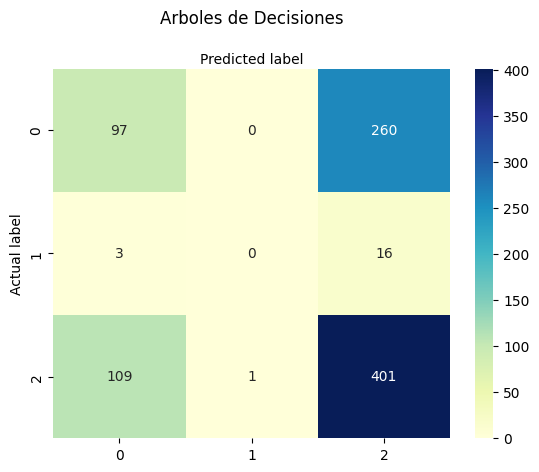

In [319]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixDT), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('Arboles de Decisiones', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [320]:
print(classification_report(y_test, y_pred_classDT, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.46      0.27      0.34       357
        Draw       0.00      0.00      0.00        19
         Red       0.59      0.78      0.68       511

    accuracy                           0.56       887
   macro avg       0.35      0.35      0.34       887
weighted avg       0.53      0.56      0.53       887



# Logistic Regresssion

In [321]:
UFC_bin = UFC[UFC['Winner'].isin(['Red', 'Blue'])]
X_bin = UFC_bin.drop(columns=['Winner'])
y_bin = UFC_bin.Winner

In [322]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, random_state=1)
logreg.fit(X_train_bin, y_train_bin)

LogisticRegression(solver='liblinear')

In [323]:
y_pred_classLR = logreg.predict(X_test_bin)

In [324]:
cnf_matrixLR = metrics.confusion_matrix(y_test_bin, y_pred_classLR) 
cnf_matrixLR

array([[110, 245],
       [ 73, 443]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

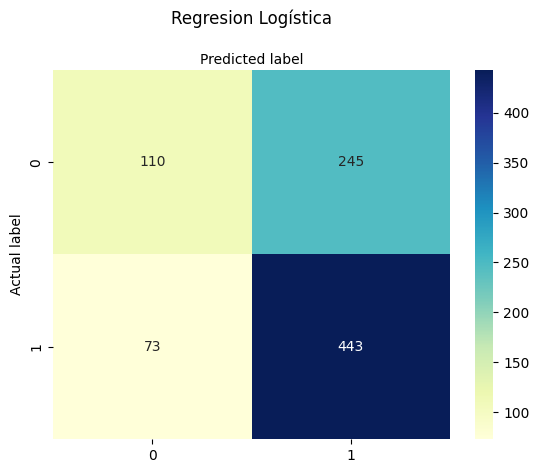

In [325]:
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixLR), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('Regresion Logística', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [326]:
print(classification_report(y_test_bin, y_pred_classLR, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.60      0.31      0.41       355
         Red       0.64      0.86      0.74       516

    accuracy                           0.63       871
   macro avg       0.62      0.58      0.57       871
weighted avg       0.63      0.63      0.60       871



# K-Nearest Neighbors

In [327]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [328]:
y_pred_classKN = knn.predict(X_test)

In [329]:
cnf_matrixKN = metrics.confusion_matrix(y_test, y_pred_classKN) 
cnf_matrixKN

array([[131,   0, 226],
       [  9,   0,  10],
       [156,   1, 354]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

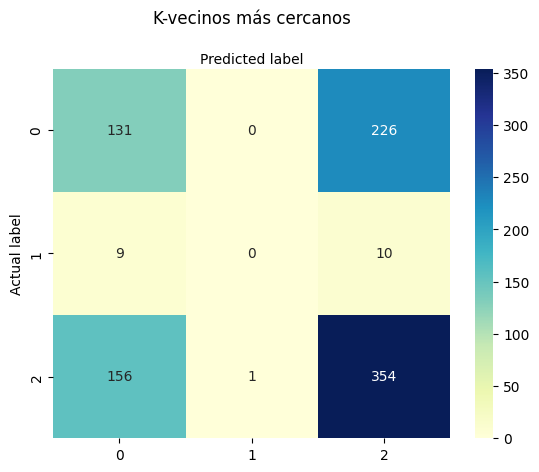

In [330]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixKN), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('K-vecinos más cercanos', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [331]:
print(classification_report(y_test, y_pred_classKN, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.44      0.37      0.40       357
        Draw       0.00      0.00      0.00        19
         Red       0.60      0.69      0.64       511

    accuracy                           0.55       887
   macro avg       0.35      0.35      0.35       887
weighted avg       0.52      0.55      0.53       887



# Support Vector Classifier

In [332]:
from sklearn.svm import SVC
svcmodel= SVC(C = 3, kernel = 'linear', random_state=1)
svcmodel.fit(X_train_bin, y_train_bin)

SVC(C=3, kernel='linear', random_state=1)

In [333]:
y_pred_classSV = svcmodel.predict(X_test_bin)

In [334]:
cnf_matrixSV = metrics.confusion_matrix(y_test_bin, y_pred_classSV) 
cnf_matrixSV

array([[138, 217],
       [125, 391]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

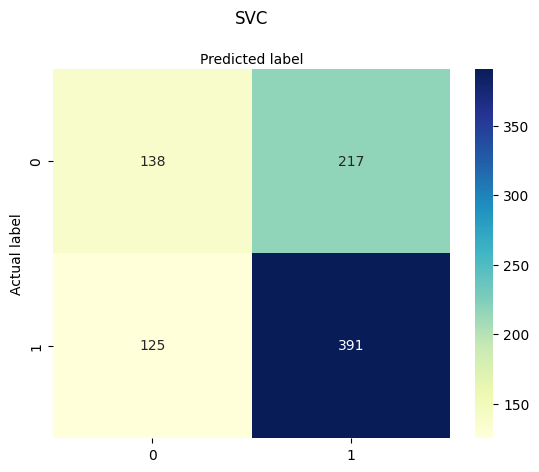

In [335]:
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixSV), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.title('SVC', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [336]:
print(classification_report(y_test_bin, y_pred_classSV, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.52      0.39      0.45       355
         Red       0.64      0.76      0.70       516

    accuracy                           0.61       871
   macro avg       0.58      0.57      0.57       871
weighted avg       0.59      0.61      0.59       871



# Neural Network

In [337]:
from sklearn.neural_network import MLPClassifier
RNmodel = MLPClassifier(solver='lbfgs', max_iter=100, alpha=1e-5,hidden_layer_sizes=(4, 5), random_state=1)
RNmodel.fit(X_train, y_train) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 5), max_iter=100,
              random_state=1, solver='lbfgs')

In [338]:
y_pred_classRN = RNmodel.predict(X_test)

In [339]:
cnf_matrixRN = metrics.confusion_matrix(y_test, y_pred_classRN) 
cnf_matrixRN 

array([[  0,   0, 357],
       [  0,   0,  19],
       [  0,   0, 511]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

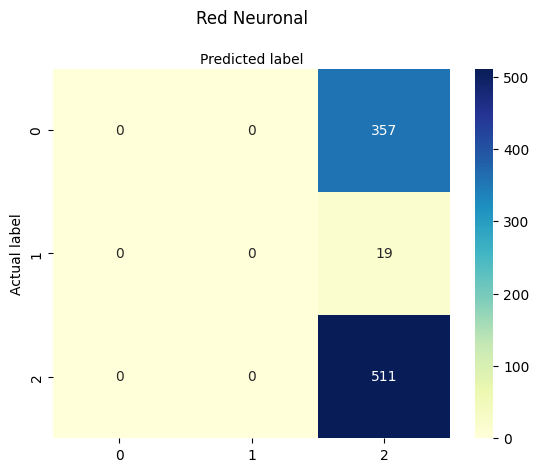

In [340]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixRN), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('Red Neuronal', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [341]:
print(classification_report(y_test, y_pred_classRN, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.00      0.00      0.00       357
        Draw       0.00      0.00      0.00        19
         Red       0.58      1.00      0.73       511

    accuracy                           0.58       887
   macro avg       0.19      0.33      0.24       887
weighted avg       0.33      0.58      0.42       887



# XG Boost

In [342]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
UFC_c = UFC
UFC_c['Winner'] = label_encoder.fit_transform(UFC_c['Winner'])
X_c = UFC_c.drop(columns=['Winner'])
y_c = UFC_c.Winner
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, random_state=1)

In [343]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_c, y_train_c)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [344]:
y_pred_classXG = xgb_model.predict(X_test_c)

In [345]:
cnf_matrixXG = metrics.confusion_matrix(y_test_c, y_pred_classXG) 
cnf_matrixXG

array([[132,   0, 225],
       [  5,   0,  14],
       [125,   0, 386]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

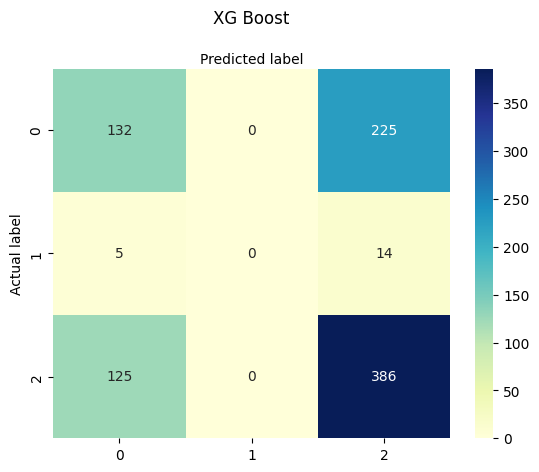

In [346]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixXG), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('XG Boost', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [347]:
print(classification_report(y_test_c, y_pred_classXG, zero_division = 0))

              precision    recall  f1-score   support

           0       0.50      0.37      0.43       357
           1       0.00      0.00      0.00        19
           2       0.62      0.76      0.68       511

    accuracy                           0.58       887
   macro avg       0.37      0.38      0.37       887
weighted avg       0.56      0.58      0.56       887

